# Important Module

In [4]:
 pip install catboost

# Important Imported Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping



from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    cohen_kappa_score,
    accuracy_score,
    classification_report
)


from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


# Dataset

In [6]:
v = pd.read_csv("/content/Churn_Modelling.csv")

In [7]:
v.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9649,9650,15788025,Tseng,715,France,Female,38,0,0.00,2,1,1,332.81,0
4317,4318,15592194,Metcalf,492,France,Female,28,9,0.00,2,1,0,95957.09,0
9243,9244,15815534,Guidry,505,Spain,Male,37,0,134006.39,1,1,1,93736.69,0
5535,5536,15694444,Buttenshaw,648,Germany,Female,32,8,157138.99,3,1,0,190994.48,1
1112,1113,15714750,Northey,690,France,Female,42,3,92578.14,2,0,0,70810.60,0


# About dataset

what is churn ??


                  In banking (and business in general), the word “churn” means the loss of customers over time — basically when existing customers stop using the bank’s services.
                  

 what is exited term used here as output ??


                     bank churn datasets, "Exited = 1" means the customer left the bank.
        The word “exited” comes from the verb “to exit”.


  what is no.of products here ??


           means  how much customers are engaged
           in banking systems ..like saving acc, personal loans , mutual funds
           etc ....
             impotant points : it is considered that customer who is engaged in lesser number of products
             have more chance to churn out.


  Tenure ??

  
              from how much time custmer has retain thier account in bank
              low tenure leads to more possibility of being churn out .    

# Understanding Data

In [8]:
v.shape
# 1000 rows and 14 columns

(10000, 14)

In [9]:
v.columns
# columns  shape

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
v.describe()

# its gives a strong understanding of whole dataset


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:

             # Age

# mean is      38
# max age is   92
# min age is   18



           # credit score

# mean     credit card score is 650
# min      credit card score is  350
# max 850  credit card score is 850




          # Balance

# mean balance is  76485
# min balance is   0.000000
# max balance is   250898.0



          # estimated salary

# mean estimated salary   is   100090.239881
# min  estimated salary   is    11.580000
# max   estimated salary  is    199992.480000

**customer relation with credit card**

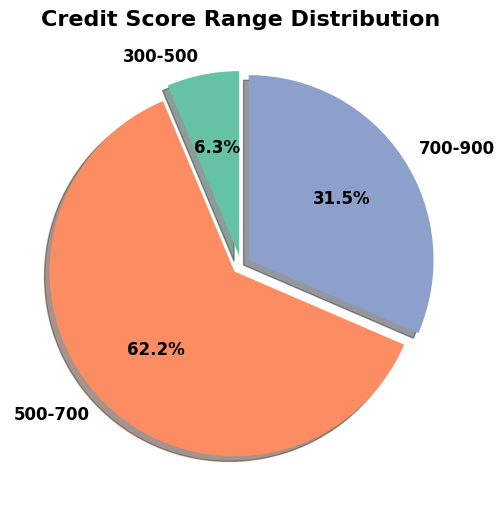

CreditScoreRange
300-500     6.32
500-700    62.20
700-900    31.48
Name: count, dtype: float64


In [12]:


# Value counts
counts = v['CreditScore'].value_counts()

# Pie chart
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define credit score ranges
bins = [300, 500, 700, 900]  # standard credit score bins
labels = ['300-500', '500-700', '700-900']

# Create range column
v['CreditScoreRange'] = pd.cut(v['CreditScore'], bins=bins, labels=labels, right=False)

# Count per range
counts = v['CreditScoreRange'].value_counts().sort_index()

# Pie chart
plt.figure(figsize=(6,6))
colors = sns.color_palette("Set2", len(counts))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=[0.05]*len(counts),
    shadow=True,
    textprops={'fontsize':12, 'fontweight':'bold'}
)
plt.title('Credit Score Range Distribution', fontsize=16, fontweight='bold')
plt.show()

# Print exact percentages
percentages = counts / counts.sum() * 100
print(percentages)

# can see 62 % percent peoples  credit card score lies at 500 to 700 .
# 31 percent  peoples  credit card score lies at 700 to 900
#  omly lesser t than 1 percent people score is between 300 too 500...

**conclusion** : majority of the people have good credit card score ...

**customer relation with  Balance**

In [13]:


# Adjusted bins
bins = [0, 10000 , 50000, 100000, 150000 , 350000]  # 3L+ upper limit covers 26 lakh
labels = ['0-10k', '10k-50k', '50k-1L', '1L-1.5L', '1.5L+ 3L']

# Create range column
v['BalanceRange'] = pd.cut(v['Balance'], bins=bins, labels=labels, right=False)

# Count per range
balance_counts = v['BalanceRange'].value_counts().sort_index()
print(balance_counts)



BalanceRange
0-10k       3618
10k-50k       74
50k-1L      1509
1L-1.5L     3830
1.5L+ 3L     969
Name: count, dtype: int64


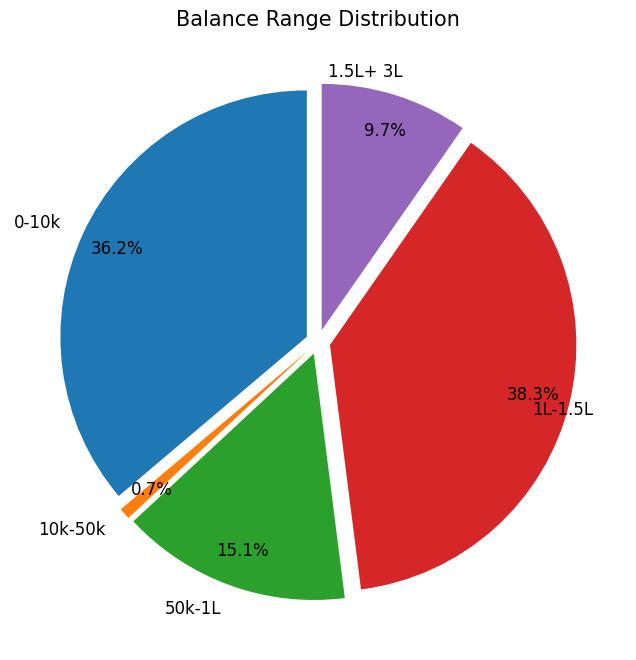

In [14]:


# Pie chart for BalanceRange
plt.figure(figsize=(8,8))
balance_counts = v['BalanceRange'].value_counts().sort_index()

wedges, texts, autotexts = plt.pie(
    balance_counts,
    labels=balance_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05]*len(balance_counts),
    pctdistance=0.85,
    textprops={'fontsize':12}
)

# Title
plt.title('Balance Range Distribution', fontsize=15)

# Better label alignment
for t in texts:
    t.set_horizontalalignment('right')

plt.show()


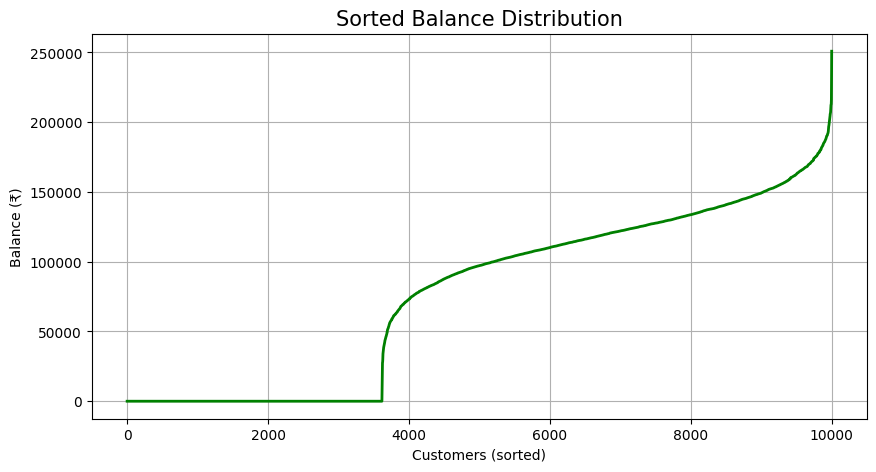

In [15]:
plt.figure(figsize=(10,5))
plt.plot(sorted(v['Balance']), color='green', linewidth=2)
plt.title('Sorted Balance Distribution', fontsize=15)
plt.xlabel('Customers (sorted)')
plt.ylabel('Balance (₹)')
plt.grid(True)
plt.show()


**conlusion**


             from inline graph we can see that from out of 10k customers ....
             6k customers  have more than 50k
             balance..


             from pie chart we can say that
             more than 50 perecent people
             have more than 50k balance


        

**customer - Age relation**

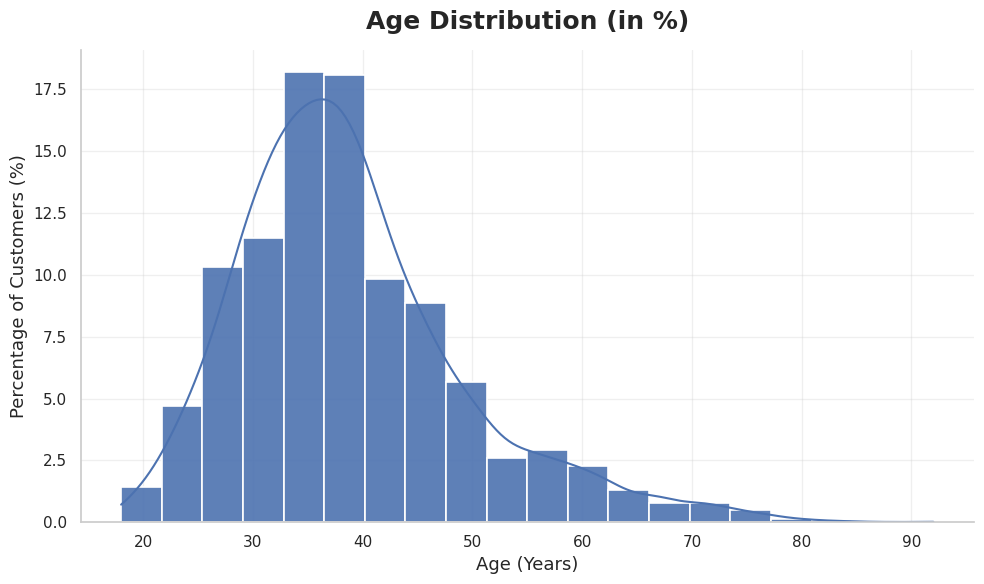

In [16]:

# Set clean style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))

# Plot kde + histogram normalized to percentage
sns.histplot(
    data=v,
    x='Age',
    bins=20,
    kde=True,
    stat='percent',
    color="#4C72B0",
    alpha=0.9,
    linewidth=1.2
)

# Labels and title
plt.title("Age Distribution (in %)", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Age (Years)", fontsize=13)
plt.ylabel("Percentage of Customers (%)", fontsize=13)

# Clean styling
sns.despine()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [17]:


# Define bins (adjust according to your dataset)
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']

# Create AgeRange column
v['AgeRange'] = pd.cut(v['Age'], bins=bins, labels=labels, right=False)


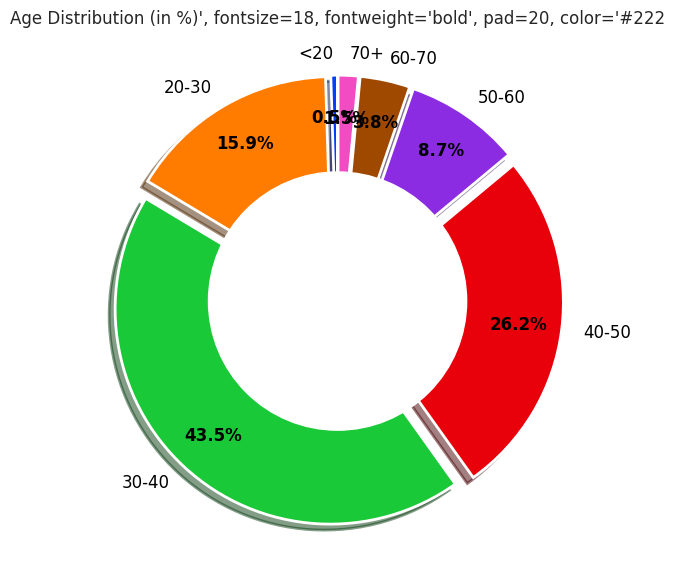

In [18]:
# Count per age range
age_counts = v['AgeRange'].value_counts().sort_index()

# Bright color palette
colors = sns.color_palette("bright", len(age_counts))

# Figure setup
plt.figure(figsize=(6,6))

# Pie chart with donut style
wedges, texts, autotexts = plt.pie(
    age_counts,
    labels=age_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05]*len(age_counts),
    colors=colors,
    pctdistance=0.8,
    textprops={'fontsize':12, 'color':'#000'},
    wedgeprops={'edgecolor':'white', 'linewidth':2},
    shadow=True
)

# Donut hole
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Bold percentage text with black for contrast
for a in autotexts:
    a.set_fontsize(12)
    a.set_color('black')
    a.set_fontweight('bold')

# Title
plt.title("Age Distribution (in %)', fontsize=18, fontweight='bold', pad=20, color='#222")

# Layout and show
plt.tight_layout()
plt.show()


**conclusion**

                60 percent customres are between the age of 30 to 45 .

    

**customer relation with  is active**

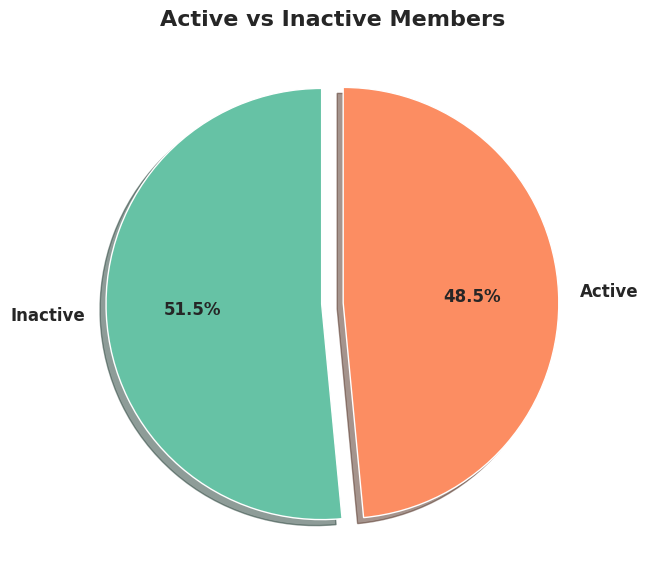

In [19]:


# Count of active/inactive members
member_counts = v['IsActiveMember'].value_counts()

# Colors
colors = sns.color_palette("Set2", len(member_counts))

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(
    member_counts,
    labels=['Inactive','Active'],  # 0 = Inactive, 1 = Active
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05,0.05],
    colors=colors,
    shadow=True,
    textprops={'fontsize':12, 'fontweight':'bold'}
)

plt.title('Active vs Inactive Members', fontsize=16, fontweight='bold')
plt.show()


**conclusion**

          almost 50 percent active
          member in bank and 50 percent
          inactive     


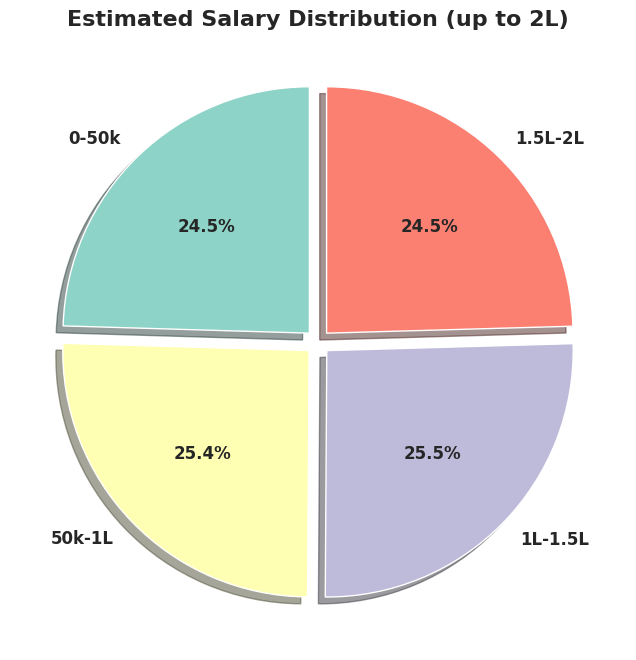

In [20]:


# Adjusted bins according to max 2L
bins = [0, 50000, 100000, 150000, 200000]  # last bin covers max value
labels = ['0-50k', '50k-1L', '1L-1.5L', '1.5L-2L']

# Create salary range column
v['SalaryRange'] = pd.cut(v['EstimatedSalary'], bins=bins, labels=labels, right=False)

# Count per range
salary_counts = v['SalaryRange'].value_counts().sort_index()

# Pie chart
plt.figure(figsize=(8,8))
colors = sns.color_palette("Set3", len(salary_counts))
plt.pie(
    salary_counts,
    labels=salary_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05]*len(salary_counts),
    colors=colors,
    shadow=True,
    textprops={'fontsize':12, 'fontweight':'bold'}
)

plt.title('Estimated Salary Distribution (up to 2L)', fontsize=16, fontweight='bold')
plt.show()


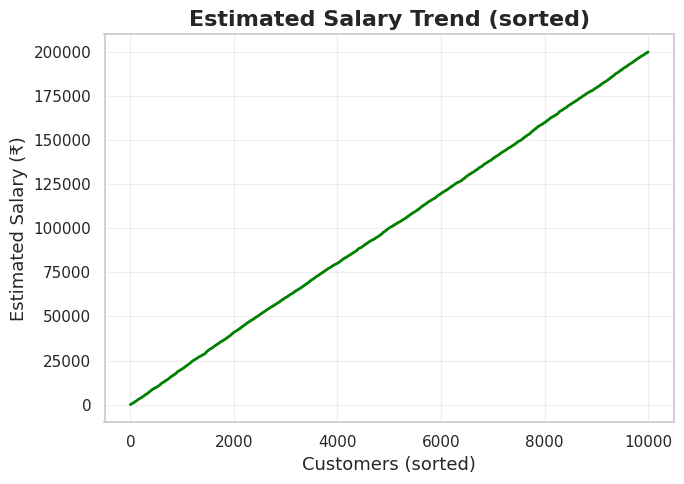

In [21]:
plt.figure(figsize=(7,5))
plt.plot(sorted(v['EstimatedSalary']), color='green', linewidth=2)
plt.title("Estimated Salary Trend (sorted)", fontsize=16, fontweight='bold')
plt.xlabel("Customers (sorted)", fontsize=13)
plt.ylabel("Estimated Salary (₹)", fontsize=13)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**conclusion**

          above 5.5k customer have more than 75k estimated salary.

In [22]:
# Count of each class
v["Exited"].value_counts(normalize=True) * 100

# it is perfectly example of imbalance dataset ....



,proportion
Exited,
0,79.63
1,20.37


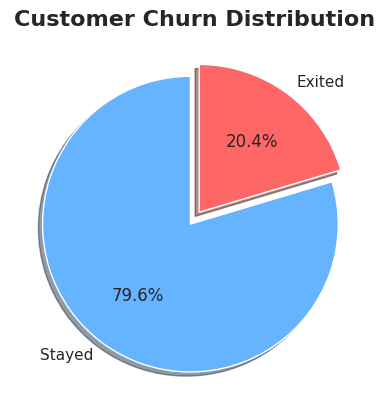

In [68]:

# Pie chart
v['Exited'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['#66b3ff','#ff6666'],
    labels=['Stayed','Exited'],
    startangle=90,
    explode=[0.05,0.05],
    shadow=True
)
plt.title('Customer Churn Distribution', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.show()

# almost 20 percent people churning the bank
# but 80 percent people not ...
# quite imbalanced  dataset .....

# Understanding Data Conclusion


   Shape of dataset:

        1. we have 10000 rows and 14 columns.     
                


  About customer Age :

         2.  average age of customer is 38,  max age is  92.
         min age is 21
         
  
   


  About customer credit score

     3.  average  credit card score of customer is 650.
     min credit card score is 350
     max credit card score is 850


  customer Bank Balance

      mean balance is  76485
      min balance is   0.000000
      max balance is   250898.0


  estimated salary of customer

    mean estimated salary of customer  is   1 lakh
    min  estimated salary   is just 11 rupees
    max   estimated salary  is almost 2 lakh.

     can see 62 % percent
     peoples  credit card score
     lies at 500 to 700


   about customer and credit card score


     can see 62 % percent
     peoples  credit card score
     lies at 500 to 700


    31 percent  peoples  credit
    card score lies at 700 to 900.

    only lesser  than 1 percent
    people score is between 300 too 500.


  Understanding customer balannce

         from inline graph we can see that from out of 10k           customers ....
         6k customers  have more than 50k
         balance..

         from pie chart we can say that
         more than 50 perecent people
         have more than 50k balance.


  customer age

     60 percent customres are
     between the age of 30 to 45 .
  
  About customer active in bank or not

      almost 50 percent active
      member in bank and 50 percent
      inactive.

  About customer salary

     above 5.5k customer have more
     than 75k estimated salary.

 Exited means churn

     about 20 percennt people
     are churning and rest reatain with
     bank.

  Overall data

    "this is very basic understanding about datasets which we have analysed

# cleaning the dataset

In [23]:
v["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

**one hot encoding of geography column**

In [24]:


geo_dummies = pd.get_dummies(v['Geography'], drop_first=True)

# Optional: convert to int
geo_dummies = geo_dummies.astype(int)

# Merge back to original dataframe
v = pd.concat([v, geo_dummies], axis=1)

# Drop original column if not needed
v.drop('Geography', axis=1, inplace=True)


**Label encoding of gender column**

In [25]:
# Binary encoding
v['Gender'] = v['Gender'].map({'Male':1, 'Female':0})


In [26]:
v.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreRange,BalanceRange,AgeRange,SalaryRange,Germany,Spain
0,1,15634602,Hargrave,619,0,42,2,0.0,1,1,1,101348.88,1,500-700,0-10k,40-50,1L-1.5L,0,0


In [27]:
#v = v.drop(["AgeRange" , "RowNumber" , "CustomerId" , "Surname" ,"SalaryRange" ,"BalanceRange" , "CreditScoreRange"] , axis = 1 )

In [28]:
v.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreRange,BalanceRange,AgeRange,SalaryRange,Germany,Spain
0,1,15634602,Hargrave,619,0,42,2,0.0,1,1,1,101348.88,1,500-700,0-10k,40-50,1L-1.5L,0,0


In [29]:
v = v.drop( ["RowNumber" , "CustomerId" , "Surname"] , axis = 1 )

In [30]:
v.isnull().sum()
# can see that  in our churn modelling no  values are missing
# in any of columns


,0
CreditScore,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0


In [31]:
v.duplicated().sum()
# can see no duplicates row we found

np.int64(0)

In [32]:
v.shape

(10000, 16)

In [33]:
 # 'Exited' column ko last me move karna
col = v.pop('Exited')
v['Exited'] = col


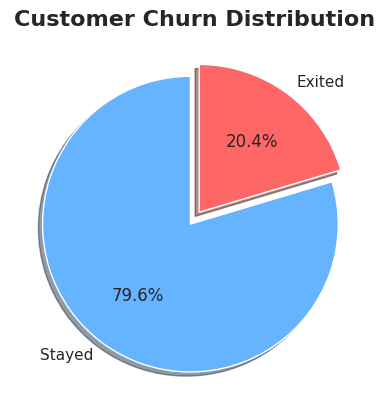

In [34]:

# Pie chart
v['Exited'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['#66b3ff','#ff6666'],
    labels=['Stayed','Exited'],
    startangle=90,
    explode=[0.05,0.05],
    shadow=True
)
plt.title('Customer Churn Distribution', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.show()

# almost 20 percent people churning the bank
# but 80 percent people not ...
# quite imbalanced  dataset .....

In [35]:
v.head(1)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScoreRange,BalanceRange,AgeRange,SalaryRange,Germany,Spain,Exited
0,619,0,42,2,0.0,1,1,1,101348.88,500-700,0-10k,40-50,1L-1.5L,0,0,1


In [36]:
v = v.drop(["CreditScoreRange" , 	"BalanceRange" ,	"AgeRange" ,	"SalaryRange"],axis =1)

# EDA

In [37]:
v.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Exited
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,0.005538,0.004780,-0.027094
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.024628,0.016889,-0.106512
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.046897,-0.001685,0.285323
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.000567,0.003868,-0.014001
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.401110,-0.134892,0.118533
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.010419,0.009039,-0.047820
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,0.010577,-0.013480,-0.007138
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.020486,0.016732,-0.156128
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.010297,-0.006482,0.012097
Germany,0.005538,-0.024628,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,1.000000,-0.332084,0.173488


In [38]:
Exited = v.corr()["Exited"].sort_values(ascending=False)
print(Exited)

Exited             1.000000
Age                0.285323
Germany            0.173488
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Spain             -0.052667
Gender            -0.106512
IsActiveMember    -0.156128
Name: Exited, dtype: float64


**positive correlations**

In [39]:
corr = v.corr()

<Axes: >

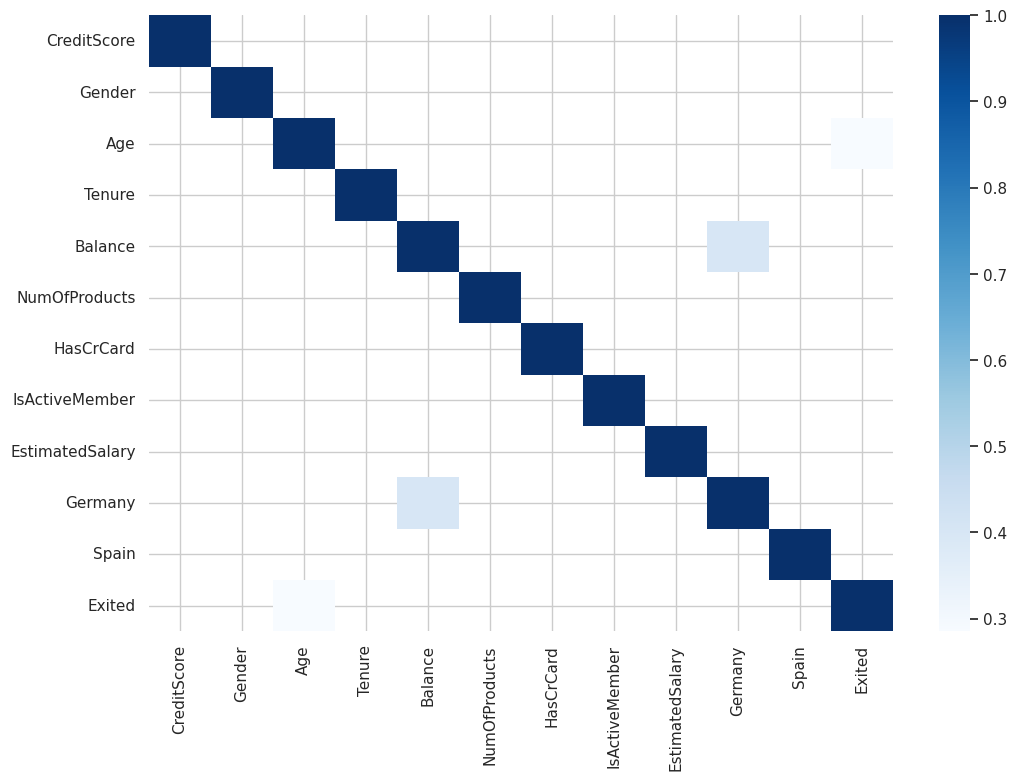

In [40]:
kot = corr[corr >= 0.25]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

**negative correlation**

<Axes: >

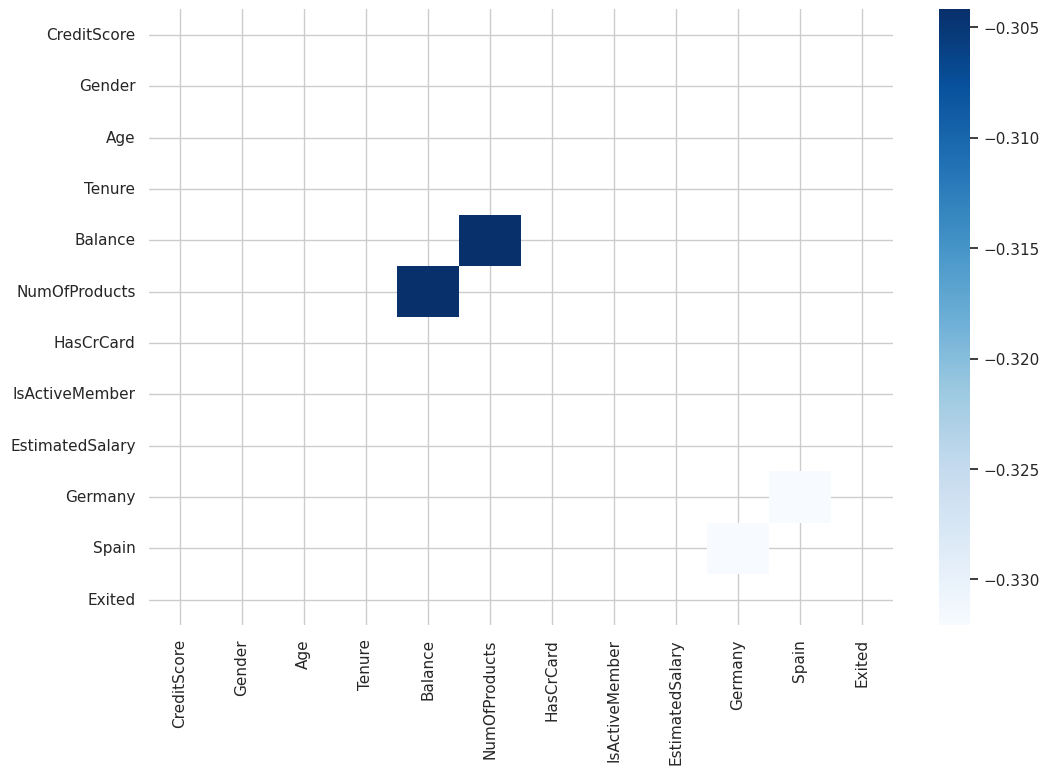

In [41]:

kot = corr[corr <= - 0.25]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")



# correlation conclusion

**correlation conclusion**

    1. germany and  balance both have
       positive correlation.

       interpretation :
          customers from Germany tends
          to  have  higher account balances.
    


           2. balance and number of products  have  quite   
          negative  correlation .

          interpretation :
             indicating that customers
             with higher balances
             usually hold fewer bank products .

        



           3. age and exited too have positive
           correlation.

            interpretation :
            implying that older
            customers  are  more likely to leave (exit) the bank.

# Feature Engineering

In [42]:
# v['Age_bin'] = pd.cut(v['Age'], bins=[18,30,40,50,60,100], labels=[1,2,3,4,5])
# v['Balance_bin'] = pd.qcut(v['Balance'], 4, labels=[1,2,3,4])


**log transformation of numerical column**

In [43]:
# log transformation of Age , estimated salary and balance column

v['Log_Balance'] = np.log1p(v['Balance'])
v['Sqrt_EstimatedSalary'] = np.sqrt(v['EstimatedSalary'])
v['Log_Age'] = np.log1p(v['Age'])



**Merdging features for better predictions**

In [44]:
# Example: avg_balance_per_product
v['Balance_per_Product'] = v['Balance'] / (v['NumOfProducts'] + 1)  # +1 avoid division by zero
v['Non_France'] = v['Germany'] | v['Spain']
v['Age_Balance'] = v['Age'] * v['Balance']
v['CreditScore_IsActive'] = v['CreditScore'] * v['IsActiveMember']
v['Tenure_NumOfProducts'] = v['Tenure'] * v['NumOfProducts']
v['Age_Gender'] = v['Age'] * v['Gender']
# v['Balance_Salary_Ratio'] = v['Balance'] / (v['EstimatedSalary'] + 1)
v['Non_France'] = v['Germany'] | v['Spain']
# v["CreditScore_to_Age"] = v["CreditScore"] / (v["Age"] + 1)


In [45]:
v.head(1)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,...,Exited,Log_Balance,Sqrt_EstimatedSalary,Log_Age,Balance_per_Product,Non_France,Age_Balance,CreditScore_IsActive,Tenure_NumOfProducts,Age_Gender
0,619,0,42,2,0.0,1,1,1,101348.88,0,...,1,0.0,318.353389,3.7612,0.0,0,0.0,619,2,0


In [46]:
v.drop(["Tenure" ,	"NumOfProducts" ,	"HasCrCard" , 	"IsActiveMember" 	,"EstimatedSalary"], axis=1).head(1)

,CreditScore,Gender,Age,Balance,Germany,Spain,Exited,Log_Balance,Sqrt_EstimatedSalary,Log_Age,Balance_per_Product,Non_France,Age_Balance,CreditScore_IsActive,Tenure_NumOfProducts,Age_Gender
0,619,0,42,0.0,0,0,1,0.0,318.353389,3.7612,0.0,0,0.0,619,2,0


In [47]:
# # Drop original Germany & Spain columns and 2 more columns
# v.drop(['Germany', 'Spain'], axis=1).head(1)

In [48]:
# 'Exited' column ko last me move karna
col = v.pop('Exited')
v['Exited'] = col

In [49]:
v.head(1)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,...,Log_Balance,Sqrt_EstimatedSalary,Log_Age,Balance_per_Product,Non_France,Age_Balance,CreditScore_IsActive,Tenure_NumOfProducts,Age_Gender,Exited
0,619,0,42,2,0.0,1,1,1,101348.88,0,...,0.0,318.353389,3.7612,0.0,0,0.0,619,2,0,1


# Data Preprocessing

**splitting the data**

In [50]:

x = v.drop(["Exited"], axis=1)
y = v["Exited"]

**handling imbalanced Dataset**
                   
           we shall handle this problem
           by making synthetic datapoints
           by using Adasyn concepts....

In [51]:
#   adasyn function


from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
x , y = adasyn.fit_resample(x , y)



# smote function

# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# x , y = sm.fit_resample(x, y)


**train test splitting**

In [52]:
# splitting the dataset into Training set and test set
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split (x , y , test_size = 0.25 , random_state = 42)

**scaling**

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Model Training

**Logistic Regression**

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# model training
lr.fit(x_train  , y_train)

from sklearn.metrics import accuracy_score
y_pred1 = lr.predict(x_test)
acc = accuracy_score(y_test , y_pred1)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


precision = precision_score(y_test, y_pred1, pos_label=1)
recall = recall_score(y_test, y_pred1, pos_label=1)
f1 = f1_score(y_test, y_pred1, pos_label=1)
cm = confusion_matrix(y_test, y_pred1)

print("Accuracy:", acc)
print(f"Confusion Matrix:\n{cm}\n")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

Accuracy: 0.8149847094801224
Confusion Matrix:
[[1731  322]
 [ 404 1467]]

Precision : 0.82
Recall : 0.78
F1-score : 0.80


**Random forest Classifier**

In [55]:
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10]
# }

# rf = RandomForestClassifier(random_state=42)
# grid = GridSearchCV(rf, param_grid, scoring='accuracy', cv=5)  # recall important for cancer
# grid.fit(x_train, y_train)

# print("Best params:", grid.best_params_)
# print("Best recall:", grid.best_score_)

In [56]:
from sklearn.metrics import accuracy_score



from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=6,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)
rf.fit(x_train, y_train)

y_pred9 = rf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred9))


Accuracy: 0.8748725790010193


**Xgboost**

In [57]:

from xgboost import XGBClassifier

# xg boost model tunning

xgb = XGBClassifier(
    n_estimators= 200,
    learning_rate= 0.4,
    max_depth= 6,
    random_state= 42,
    eval_metric='logloss'
)

# fitting xgboost to train dataset

xgb.fit(x_train, y_train)

# prediction xg boost model over test dataset
y_pred5 = xgb.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred5))
print("Precision:", precision_score(y_test, y_pred5))
print("Recall:", recall_score(y_test, y_pred5))
print("F1-score:", f1_score(y_test, y_pred5))

Accuracy: 0.8965341488277269
Precision: 0.9085331846068042
Recall: 0.8706574024585783
F1-score: 0.8891921397379913


**Catboost CLassifier**

In [58]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(
    iterations=600,
    learning_rate=0.06, # 0.05
    depth=6,
    eval_metric='Accuracy',
    random_seed=42,
    verbose=0
)
cat.fit(x_train, y_train)
y_pred11 = cat.predict(x_test)

y_prob = cat.predict_proba(x_test)[:, 1]


print("Accuracy:", accuracy_score(y_test, y_pred11))
print("Precision:", precision_score(y_test, y_pred11))
print("Recall:", recall_score(y_test, y_pred11))
print("F1-score:", f1_score(y_test, y_pred11))

Accuracy: 0.9041794087665648
Precision: 0.9201798763350196
Recall: 0.874933190807055
F1-score: 0.896986301369863


**dumping trained model in pickle format**

In [59]:
import pickle

# Save trained model to pickle file
with open('catboost_cat_model.pkl', 'wb') as file:
    pickle.dump(cat, file)

print(" 'catboost_cat_model.pkl'")


 'catboost_cat_model.pkl'


**making predictions file in csv**

In [60]:


# Convert to DataFrame
v_pred = pd.DataFrame(y_pred11, columns=['Prediction'])

# Save to CSV
v_pred.to_csv('catboost_predictions.csv', index=False)

print("catboost_predictions.csv'")


catboost_predictions.csv'


# Final Catboost Accuracy Matrix Evaluation

In [61]:

print("Accuracy:", accuracy_score(y_test, y_pred11))
print("Precision:", precision_score(y_test, y_pred11))
print("Recall:", recall_score(y_test, y_pred11))
print("F1-score:", f1_score(y_test, y_pred11))

Accuracy: 0.9041794087665648
Precision: 0.9201798763350196
Recall: 0.874933190807055
F1-score: 0.896986301369863


In [62]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    cohen_kappa_score,
    accuracy_score,
    classification_report
)

**confusion matrix of catboost classifier**

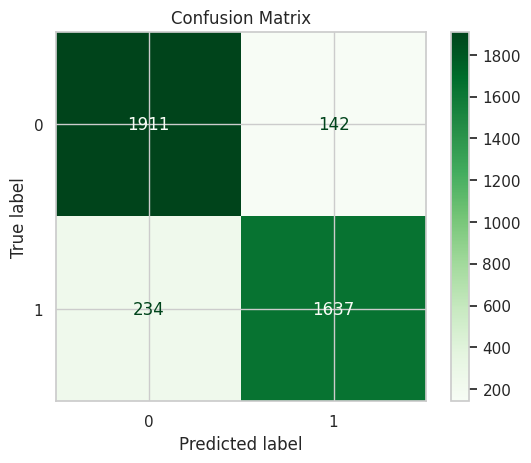

In [63]:
cm = confusion_matrix(y_test, y_pred11)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = "Greens")
plt.title("Confusion Matrix")
plt.show()

**roc curve plotting**

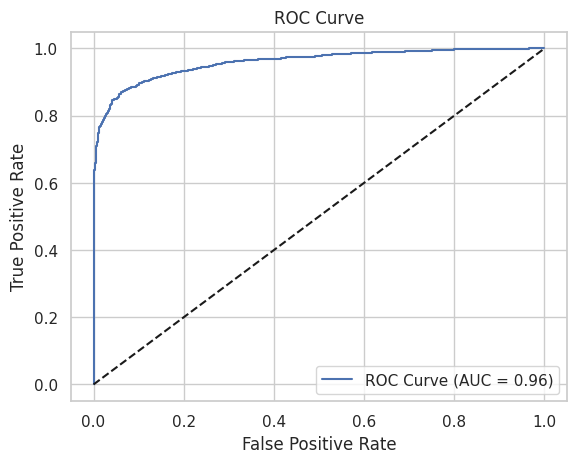

In [64]:
# ---  ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [65]:
# --- Cohen’s Kappa ---
kappa = cohen_kappa_score(y_test, y_pred11)
print("Cohen’s Kappa Score:", round(kappa, 3))



# ---  Extra: Accuracy & Report ---
print("Accuracy:", round(accuracy_score(y_test, y_pred11), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred11))

Cohen’s Kappa Score: 0.808
Accuracy: 0.904

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      2053
           1       0.92      0.87      0.90      1871

    accuracy                           0.90      3924
   macro avg       0.91      0.90      0.90      3924
weighted avg       0.90      0.90      0.90      3924



# accuracy conclusion Catboost
    
Accuracy: 0.9041794087665648

Precision: 0.9201798763350196

Recall: 0.874933190807055

F1-score: 0.896986301369863

roc cuve = 0.96

kappa score = 808

In [66]:
import pandas as pd

# Metrics dictionary
metrics = {
    'Model': 'CatBoost',
    'Accuracy': 0.9041794087665648,
    'Precision': 0.9201798763350196,
    'Recall': 0.874933190807055,
    'F1-score': 0.896986301369863,
    'ROC AUC': 0.96,
    'Kappa Score': 0.808
}

# Convert to DataFrame (vertical form)
df_metrics = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# Display
print(df_metrics)




        Metric     Value
0        Model  CatBoost
1     Accuracy  0.904179
2    Precision   0.92018
3       Recall  0.874933
4     F1-score  0.896986
5      ROC AUC      0.96
6  Kappa Score     0.808


**making csv file of accuracy evaluations matrix**

In [67]:

# Save to CSV
df_metrics.to_csv("catboost_metrics.csv", index=False)

print(" 'catboost_metrics.csv'")

 'catboost_metrics.csv'
